In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import os


In [2]:
os.chdir(r"C:\Users\BIG SHARK TECHNOLOGY\Desktop\climate-agriculture-cameroon")
os.getcwd()


'C:\\Users\\BIG SHARK TECHNOLOGY\\Desktop\\climate-agriculture-cameroon'

In [3]:
df1=pd.read_excel("data/raw/FAOSTAT_crop_yield.xlsx")
df2=pd.read_excel("data/raw/rainfall_worldbank.xlsx")


In [4]:
df2.drop(columns="code", inplace=True)
df2

,name,2000-07,2001-07,2002-07,2003-07,2004-07,2005-07,2006-07,2007-07,2008-07,...,2014-07,2015-07,2016-07,2017-07,2018-07,2019-07,2020-07,2021-07,2022-07,2023-07
0,Côte d'Ivoire,1155.77,1110.48,1258.66,1345.46,1218.30,1250.55,1162.20,1331.90,1385.73,...,1322.12,1153.33,1204.15,1270.67,1446.90,1448.49,1152.27,1265.80,1250.88,1161.98
1,Cameroon,1803.57,1681.92,1733.40,1704.82,1741.73,1593.05,1545.94,1764.19,1639.45,...,1795.21,1638.41,1806.99,1711.44,1664.44,1910.41,1624.95,1608.75,1566.45,1728.30
2,Ghana,1002.70,886.26,1119.62,1140.32,957.97,1022.82,985.20,1118.65,1110.00,...,1193.97,976.74,1209.41,1120.45,1338.44,1335.04,1014.24,1052.25,1093.49,1171.78
3,Nigeria,1033.15,998.16,1051.55,1007.59,999.91,988.48,1008.70,1040.05,1087.07,...,1176.60,1030.93,1178.99,1052.20,1081.44,1264.21,1001.08,888.86,993.73,976.94


In [5]:
rain_df = df2.melt(
    id_vars=["name"],   
    var_name="year",        
    value_name="rainfall_mm" 
)
rain_df

,name,year,rainfall_mm
0,Côte d'Ivoire,2000-07,1155.77
1,Cameroon,2000-07,1803.57
2,Ghana,2000-07,1002.70
3,Nigeria,2000-07,1033.15
4,Côte d'Ivoire,2001-07,1110.48
...,...,...,...
91,Nigeria,2022-07,993.73
92,Côte d'Ivoire,2023-07,1161.98
93,Cameroon,2023-07,1728.30
94,Ghana,2023-07,1171.78


In [6]:
rain_df["year"] = rain_df["year"].str.slice(0,4).astype(int)
rain_df = rain_df.rename(columns={"name": "Country", "year": "Year"})

rain_df

,Country,Year,rainfall_mm
0,Côte d'Ivoire,2000,1155.77
1,Cameroon,2000,1803.57
2,Ghana,2000,1002.70
3,Nigeria,2000,1033.15
4,Côte d'Ivoire,2001,1110.48
...,...,...,...
91,Nigeria,2022,993.73
92,Côte d'Ivoire,2023,1161.98
93,Cameroon,2023,1728.30
94,Ghana,2023,1171.78


In [7]:
drop_cols = df1[["Domain Code", "Domain", "Area Code (M49)","Element Code", "Element", "Item Code (CPC)","Item", "Year Code", "Unit", "Flag", "Flag Description", "Note"]]
df1.drop(columns=drop_cols, inplace=True)
crop_df=df1


In [8]:
crop_df = crop_df.rename(columns={"Area": "Country", "Value": "Maize yield_kg/ha"})
crop_df

,Country,Year,Maize yield_kg/ha
0,Cameroon,2000,2461.5
1,Cameroon,2001,2440.4
2,Cameroon,2002,2067.9
3,Cameroon,2003,1990.8
4,Cameroon,2004,1916.6
...,...,...,...
95,Nigeria,2020,2050.6
96,Nigeria,2021,2053.8
97,Nigeria,2022,2232.6
98,Nigeria,2023,1939.1


In [9]:
crop_df[["Country", "Year"]].drop_duplicates()
rain_df[["Country", "Year"]].drop_duplicates()


,Country,Year
0,Côte d'Ivoire,2000
1,Cameroon,2000
2,Ghana,2000
3,Nigeria,2000
4,Côte d'Ivoire,2001
...,...,...
91,Nigeria,2022
92,Côte d'Ivoire,2023
93,Cameroon,2023
94,Ghana,2023


In [10]:
df=pd.merge(
    crop_df,
    rain_df,
    on=["Country", "Year"],
    how="inner"
 )
df


,Country,Year,Maize yield_kg/ha,rainfall_mm
0,Cameroon,2000,2461.5,1803.57
1,Cameroon,2001,2440.4,1681.92
2,Cameroon,2002,2067.9,1733.40
3,Cameroon,2003,1990.8,1704.82
4,Cameroon,2004,1916.6,1741.73
...,...,...,...,...
91,Nigeria,2019,1857.2,1264.21
92,Nigeria,2020,2050.6,1001.08
93,Nigeria,2021,2053.8,888.86
94,Nigeria,2022,2232.6,993.73


In [11]:
# df.to_csv("merged_climate_yield.csv")

In [12]:
merged_df = df.sort_values(["Country", "Year"])
merged_df["rainfall_lag1"] = (
    merged_df
    .groupby("Country")["rainfall_mm"]
    .shift(1)
)
merged_df

,Country,Year,Maize yield_kg/ha,rainfall_mm,rainfall_lag1
0,Cameroon,2000,2461.5,1803.57,NaN
1,Cameroon,2001,2440.4,1681.92,1803.57
2,Cameroon,2002,2067.9,1733.40,1681.92
3,Cameroon,2003,1990.8,1704.82,1733.40
4,Cameroon,2004,1916.6,1741.73,1704.82
...,...,...,...,...,...
91,Nigeria,2019,1857.2,1264.21,1081.44
92,Nigeria,2020,2050.6,1001.08,1264.21
93,Nigeria,2021,2053.8,888.86,1001.08
94,Nigeria,2022,2232.6,993.73,888.86


In [13]:
panel_df = merged_df.dropna().reset_index(drop=True)


In [14]:
cmr=df[(df["Country"] == "Cameroon")]


<Axes: title={'center': 'Maize Yield over Time'}, xlabel='Year'>

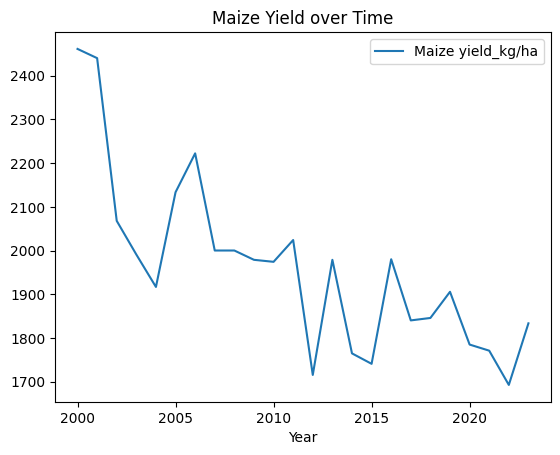

In [15]:
cmr.plot(x="Year", y="Maize yield_kg/ha", title = "Maize Yield over Time")

<Axes: title={'center': 'Rainfall over Time'}, xlabel='Year'>

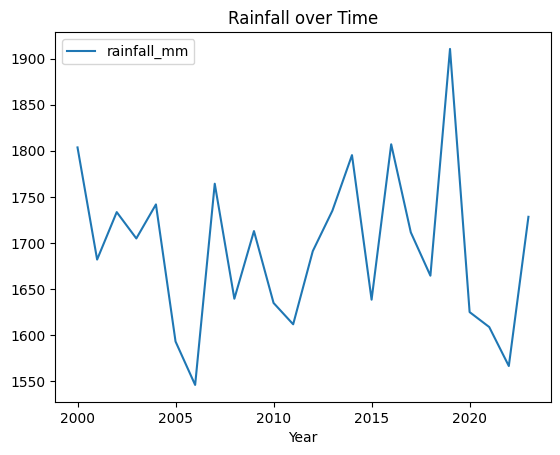

In [16]:
cmr.plot(x="Year", y="rainfall_mm", title = "Rainfall over Time")

In [17]:
cmr.groupby("Year").size().describe()


count    24.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
dtype: float64

In [18]:
cmr_yearly = cmr.copy()

In [19]:
cmr_yearly["rainfall_lag1"] = cmr_yearly["rainfall_mm"].shift(1)
cmr_yearly.head()

,Country,Year,Maize yield_kg/ha,rainfall_mm,rainfall_lag1
0,Cameroon,2000,2461.5,1803.57,NaN
1,Cameroon,2001,2440.4,1681.92,1803.57
2,Cameroon,2002,2067.9,1733.40,1681.92
3,Cameroon,2003,1990.8,1704.82,1733.40
4,Cameroon,2004,1916.6,1741.73,1704.82


In [20]:
model_df = cmr_yearly.dropna(
    subset=["Maize yield_kg/ha", "rainfall_mm", "rainfall_lag1"]
)

In [21]:
# define dependent varable
y = model_df["Maize yield_kg/ha"]

#  define independent variable
x = model_df[["rainfall_mm", "rainfall_lag1"]]

# Intercept
x = sm.add_constant(x)

# fit model
model_base = sm.OLS(y, x).fit()

# results
model_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Maize yield_kg/ha   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.093
Method:                 Least Squares   F-statistic:                   0.06394
Date:                Tue, 27 Jan 2026   Prob (F-statistic):              0.938
Time:                        20:41:01   Log-Likelihood:                -150.84
No. Observations:                  23   AIC:                             307.7
Df Residuals:                      20   BIC:                             311.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2058.1150   1140.177      1.805      0.086    -320.252    4436.482
rainfall_mm      -0.1399      0.461     -0.304      0.765      -1.101       0.821
rainfall_lag1     0.0693      0.445      0.156      0.878      -0.860       0.998
==============================================================================
Omnibus:                        5.613   Durbin-Watson:                   0.906
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                3.477
Skew:                           0.820   Prob(JB):                        0.176
Kurtosis:                       3.969   Cond. No.                     7.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
model_df["Year"] = model_df["Year"].astype(int)

C:\Users\BIG SHARK TECHNOLOGY\AppData\Local\Temp\ipykernel_18252\3587918183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["Year"] = model_df["Year"].astype(int)


In [23]:
y = model_df["Maize yield_kg/ha"]

x = model_df[["rainfall_mm", "rainfall_lag1", "Year"]]

x = sm.add_constant(x)

model_trend = sm.OLS(y, x).fit()

model_trend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Maize yield_kg/ha   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     7.840
Date:                Tue, 27 Jan 2026   Prob (F-statistic):            0.00132
Time:                        20:41:01   Log-Likelihood:                -141.65
No. Observations:                  23   AIC:                             291.3
Df Residuals:                      19   BIC:                             295.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.072e+04   8057.280      5.054      0.000    2.39e+04    5.76e+04
rainfall_mm      -0.0809      0.317     -0.255      0.801      -0.745       0.583
rainfall_lag1    -0.0517      0.307     -0.168      0.868      -0.695       0.592
Year            -19.1650      3.975     -4.822      0.000     -27.484     -10.846
==============================================================================
Omnibus:                        1.444   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.486   Jarque-Bera (JB):                0.482
Skew:                           0.312   Prob(JB):                        0.786
Kurtosis:                       3.336   Cond. No.                     9.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
aic_base = model_base.aic
aic_trend = model_trend.aic

bic_base = model_base.bic
bic_trend = model_trend.bic

print("AIC base:", aic_base, "AIC trend:", aic_trend)
print("BIC base:", bic_base, "BIC trend:", bic_trend)

AIC base: 307.6824697813961 AIC trend: 291.30237561707025
BIC base: 311.08895242918356 BIC trend: 295.8443524807868


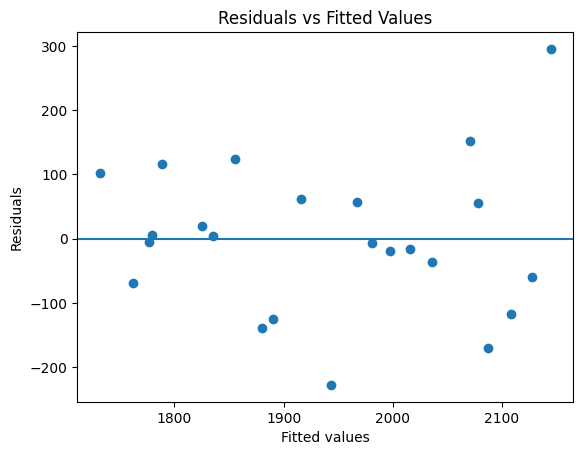

In [25]:

residuals = model_trend.resid
fitted = model_trend.fittedvalues

plt.scatter(fitted, residuals)
plt.axhline(0)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()


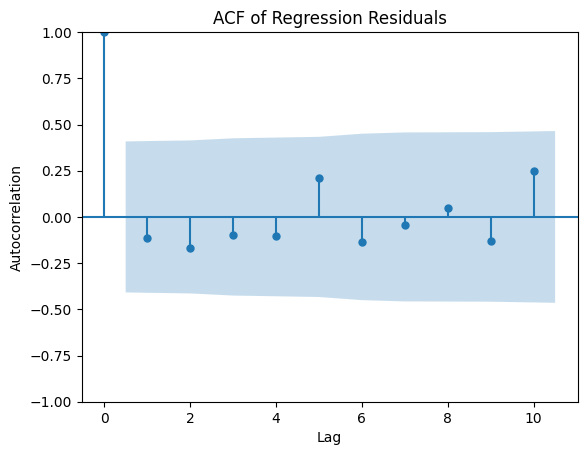

In [26]:
plot_acf(residuals, lags=10)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("ACF of Regression Residuals")
plt.show()

In [27]:
panel_y = panel_df["Maize yield_kg/ha"]

panel_X = panel_df[["rainfall_mm", "rainfall_lag1", "Year"]]
panel_X = sm.add_constant(panel_X)

panel_model = sm.OLS(panel_y, panel_X).fit()
panel_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Maize yield_kg/ha   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     5.674
Date:                Tue, 27 Jan 2026   Prob (F-statistic):            0.00134
Time:                        20:41:03   Log-Likelihood:                -643.07
No. Observations:                  92   AIC:                             1294.
Df Residuals:                      88   BIC:                             1304.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.896e+04   8506.945     -3.405      0.001   -4.59e+04   -1.21e+04
rainfall_mm       0.0057      0.224      0.025      0.980      -0.440       0.452
rainfall_lag1     0.1781      0.223      0.800      0.426      -0.265       0.621
Year             15.2370      4.232      3.600      0.001       6.827      23.647
==============================================================================
Omnibus:                        4.452   Durbin-Watson:                   0.716
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                4.375
Skew:                           0.490   Prob(JB):                        0.112
Kurtosis:                       2.574   Cond. No.                     8.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
aic_base = model_base.aic
aic_panel = panel_model.aic

bic_base = model_base.bic
bic_panel = panel_model.bic

print("AIC base:", aic_base, "AIC panel:", aic_panel)
print("BIC base:", bic_base, "BIC Panel:", bic_panel)

AIC base: 307.6824697813961 AIC panel: 1294.1495534610408
BIC base: 311.08895242918356 BIC Panel: 1304.236707769237


In [29]:
panel_df["rainfall_sq"] = panel_df["rainfall_mm"] ** 2

X_quad = panel_df[["rainfall_mm", "rainfall_sq", "rainfall_lag1", "Year"]]
X_quad = sm.add_constant(X_quad)

model_quad = sm.OLS(panel_y, X_quad).fit()
print(model_quad.summary())


                            OLS Regression Results                            
Dep. Variable:      Maize yield_kg/ha   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     7.735
Date:                Tue, 27 Jan 2026   Prob (F-statistic):           2.22e-05
Time:                        20:41:03   Log-Likelihood:                -637.21
No. Observations:                  92   AIC:                             1284.
Df Residuals:                      87   BIC:                             1297.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -2.94e+04   8028.527     -3.662

In [30]:
aic_base = model_base.aic
aic_quad = model_quad.aic

bic_base = model_base.bic
bic_quad = model_quad.bic

print("AIC base:", aic_base, "AIC quadrant:", aic_quad)
print("BIC base:", bic_base, "BIC quadrant:", bic_quad)

AIC base: 307.6824697813961 AIC quadrant: 1284.4244726910806
BIC base: 311.08895242918356 BIC quadrant: 1297.0334155763258


In [31]:
forest_df = pd.DataFrame({
    "variable": model_trend.params.index,
    "coef": model_trend.params.values,
    "lower": model_trend .conf_int()[0].values,
    "upper": model_trend.conf_int()[1].values
})
forest_df

,variable,coef,lower,upper
0,const,40723.247654,23859.166740,57587.328568
1,rainfall_mm,-0.080933,-0.745088,0.583221
2,rainfall_lag1,-0.051707,-0.695086,0.591673
3,Year,-19.164988,-27.484224,-10.845752


In [32]:
forest_df = forest_df.sort_values(by="variable")

In [33]:
forest_df = forest_df[forest_df["variable"] != "const"]

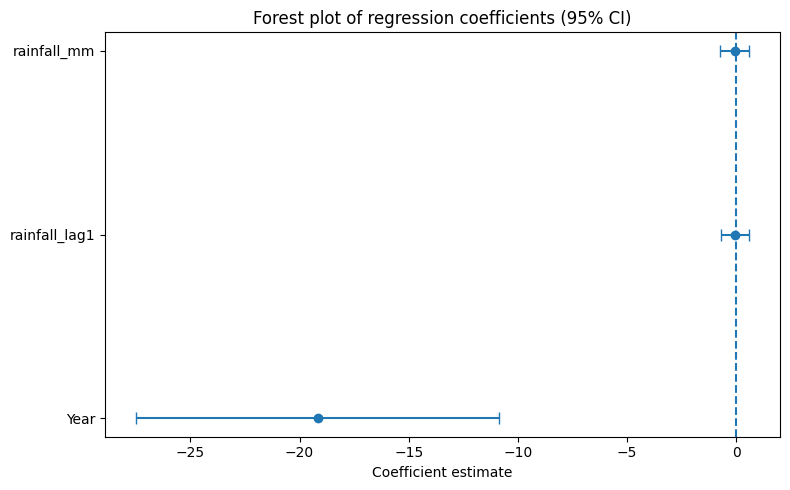

In [34]:

plt.figure(figsize=(8, 5))

plt.errorbar(
    forest_df["coef"],
    forest_df["variable"],
    xerr=[
        forest_df["coef"] - forest_df["lower"],
        forest_df["upper"] - forest_df["coef"]
    ],
    fmt="o",
    capsize=4
)

plt.axvline(x=0, linestyle="--")
plt.xlabel("Coefficient estimate")
plt.title("Forest plot of regression coefficients (95% CI)")
plt.tight_layout()
plt.show()


In [35]:
gha = df[df["Country"] == "Ghana"].copy()

<Axes: title={'center': 'Maize Yield over Time'}, xlabel='Year'>

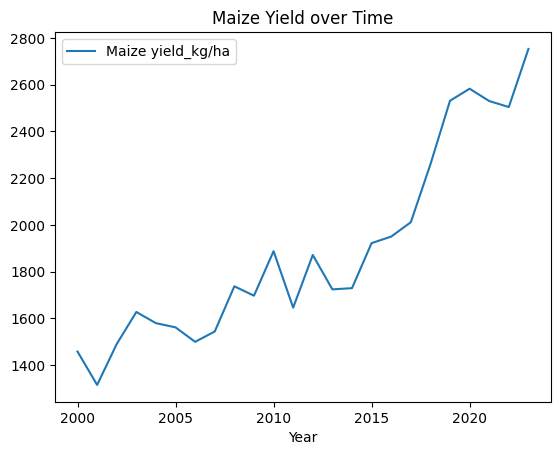

In [36]:
gha.plot(x="Year", y="Maize yield_kg/ha", title = "Maize Yield over Time")

<Axes: title={'center': 'Rainfall over Time'}, xlabel='Year'>

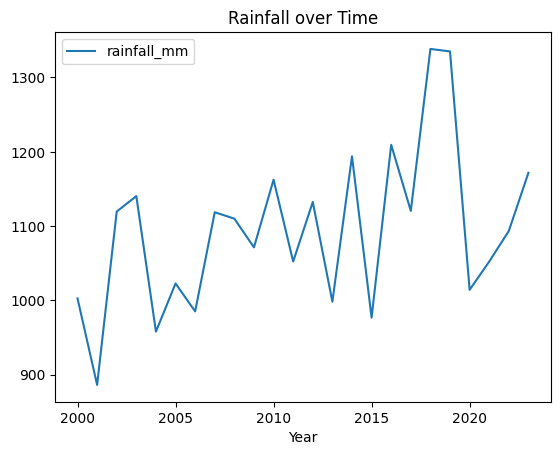

In [37]:
gha.plot(x="Year", y="rainfall_mm", title = "Rainfall over Time")

In [38]:
gha["rainfall_lag1"] = gha["rainfall_mm"].shift(1)
gha.dropna(inplace=True)
gha.head()

,Country,Year,Maize yield_kg/ha,rainfall_mm,rainfall_lag1
49,Ghana,2001,1315.0,886.26,1002.70
50,Ghana,2002,1490.0,1119.62,886.26
51,Ghana,2003,1627.2,1140.32,1119.62
52,Ghana,2004,1579.4,957.97,1140.32
53,Ghana,2005,1561.3,1022.82,957.97


In [39]:
y = gha["Maize yield_kg/ha"]

x = gha[["rainfall_mm", "rainfall_lag1", "Year"]]

x = sm.add_constant(x)

model_gha = sm.OLS(y, x).fit()

model_gha.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Maize yield_kg/ha   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     39.72
Date:                Tue, 27 Jan 2026   Prob (F-statistic):           2.20e-08
Time:                        20:41:05   Log-Likelihood:                -147.93
No. Observations:                  23   AIC:                             303.9
Df Residuals:                      19   BIC:                             308.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.037e+05   1.24e+04     -8.344      0.000    -1.3e+05   -7.77e+04
rainfall_mm       0.2466      0.353      0.699      0.493      -0.492       0.985
rainfall_lag1     0.3621      0.353      1.027      0.318      -0.376       1.100
Year             52.1549      6.333      8.235      0.000      38.899      65.411
==============================================================================
Omnibus:                        2.496   Durbin-Watson:                   0.663
Prob(Omnibus):                  0.287   Jarque-Bera (JB):                1.342
Skew:                          -0.252   Prob(JB):                        0.511
Kurtosis:                       1.930   Cond. No.                     9.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
nga = df[df["Country"] == "Nigeria"].copy()

nga["rainfall_lag1"] = nga["rainfall_mm"].shift(1)
nga.dropna(inplace=True)
nga.head()

,Country,Year,Maize yield_kg/ha,rainfall_mm,rainfall_lag1
73,Nigeria,2001,1399.9,998.16,1033.15
74,Nigeria,2002,1489.9,1051.55,998.16
75,Nigeria,2003,1499.9,1007.59,1051.55
76,Nigeria,2004,1600.2,999.91,1007.59
77,Nigeria,2005,1659.8,988.48,999.91


<Axes: title={'center': 'Maize Yield over Time'}, xlabel='Year'>

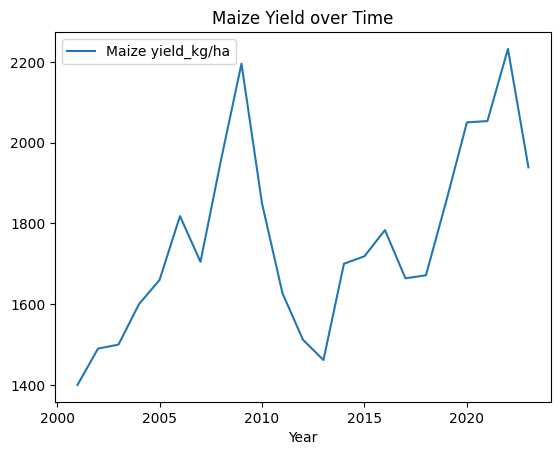

In [41]:
nga.plot(x="Year", y="Maize yield_kg/ha", title = "Maize Yield over Time")

<Axes: title={'center': 'Rainfall over Time'}, xlabel='Year'>

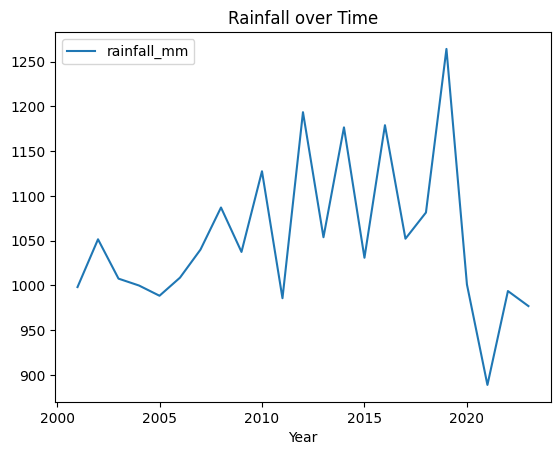

In [42]:
nga.plot(x="Year", y="rainfall_mm", title = "Rainfall over Time")

In [43]:
y = nga["Maize yield_kg/ha"]

x = nga[["rainfall_mm", "rainfall_lag1", "Year"]]

x = sm.add_constant(x)

model_nga = sm.OLS(y, x).fit()

model_nga.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Maize yield_kg/ha   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     4.353
Date:                Tue, 27 Jan 2026   Prob (F-statistic):             0.0171
Time:                        20:41:06   Log-Likelihood:                -151.31
No. Observations:                  23   AIC:                             310.6
Df Residuals:                      19   BIC:                             315.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.982e+04   1.22e+04     -3.255      0.004   -6.54e+04   -1.42e+04
rainfall_mm      -0.5200      0.479     -1.086      0.291      -1.522       0.482
rainfall_lag1    -0.5850      0.493     -1.187      0.250      -1.617       0.447
Year             21.2469      6.135      3.463      0.003       8.406      34.088
==============================================================================
Omnibus:                        8.264   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                5.967
Skew:                           1.107   Prob(JB):                       0.0506
Kurtosis:                       4.150   Cond. No.                     7.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
civ = df[df["Country"] == "Côte d'Ivoire"].copy()

civ["rainfall_lag1"] = civ["rainfall_mm"].shift(1)
civ.dropna(inplace=True)
civ.head()

,Country,Year,Maize yield_kg/ha,rainfall_mm,rainfall_lag1
25,Côte d'Ivoire,2001,2097.5,1110.48,1155.77
26,Côte d'Ivoire,2002,2168.7,1258.66,1110.48
27,Côte d'Ivoire,2003,2242.2,1345.46,1258.66
28,Côte d'Ivoire,2004,2224.2,1218.30,1345.46
29,Côte d'Ivoire,2005,2113.8,1250.55,1218.30


<Axes: title={'center': 'Maize Yield over Time'}, xlabel='Year'>

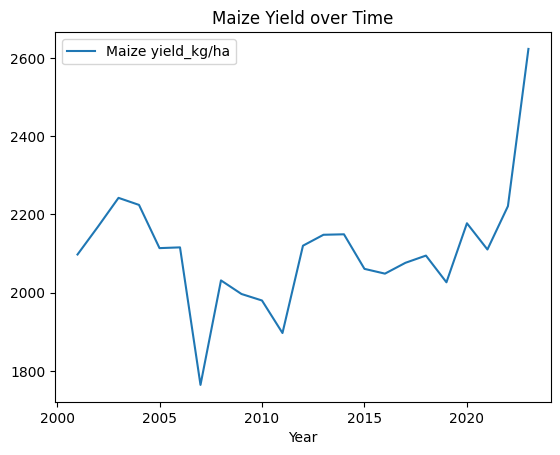

In [45]:
civ.plot(x="Year", y="Maize yield_kg/ha", title = "Maize Yield over Time")

<Axes: title={'center': 'Rainfall over Time'}, xlabel='Year'>

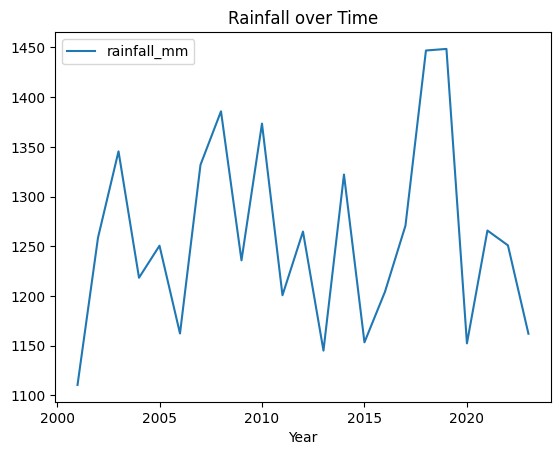

In [46]:
civ.plot(x="Year", y="rainfall_mm", title = "Rainfall over Time")

In [47]:
y = civ["Maize yield_kg/ha"]

x = civ[["rainfall_mm", "rainfall_lag1", "Year"]]

x = sm.add_constant(x)

model_civ = sm.OLS(y, x).fit()

model_civ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Maize yield_kg/ha   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1.414
Date:                Tue, 27 Jan 2026   Prob (F-statistic):              0.270
Time:                        20:41:07   Log-Likelihood:                -145.89
No. Observations:                  23   AIC:                             299.8
Df Residuals:                      19   BIC:                             304.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.165e+04   9731.876     -1.197      0.246    -3.2e+04    8718.674
rainfall_mm      -0.5039      0.337     -1.494      0.152      -1.210       0.202
rainfall_lag1    -0.1458      0.344     -0.424      0.677      -0.866       0.575
Year              7.2448      4.887      1.483      0.155      -2.983      17.473
==============================================================================
Omnibus:                        5.356   Durbin-Watson:                   1.167
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                3.335
Skew:                           0.650   Prob(JB):                        0.189
Kurtosis:                       4.337   Cond. No.                     8.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

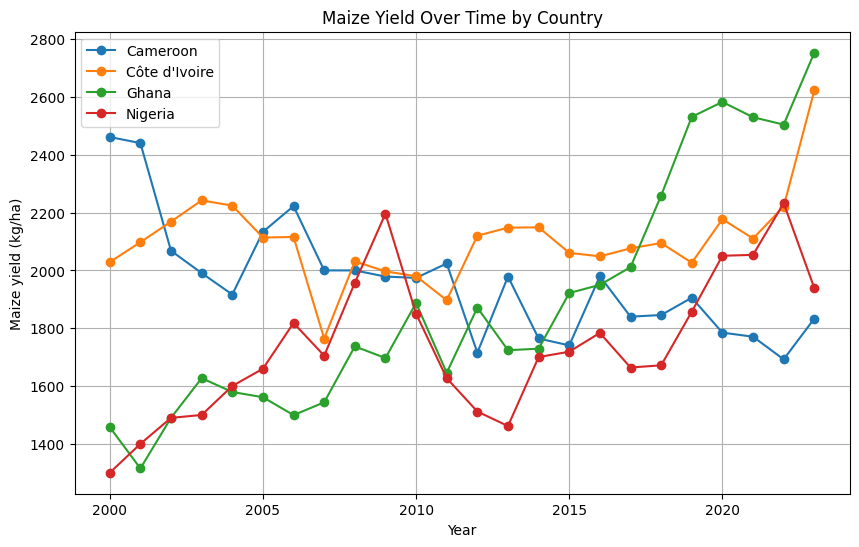

In [48]:

plt.figure(figsize=(10, 6))

for country in df["Country"].unique():
    subset = df[df["Country"] == country]
    plt.plot(
        subset["Year"],
        subset["Maize yield_kg/ha"],
        marker="o",
        label=country
    )

plt.xlabel("Year")
plt.ylabel("Maize yield (kg/ha)")
plt.title("Maize Yield Over Time by Country")
plt.legend()
plt.grid(True)

plt.show()


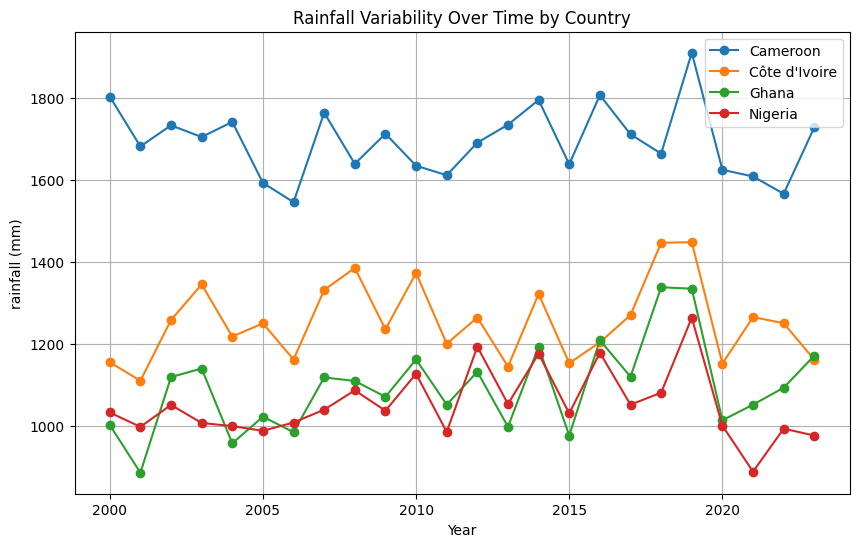

In [49]:

plt.figure(figsize=(10, 6))

for country in df["Country"].unique():
    subset = df[df["Country"] == country]
    plt.plot(
        subset["Year"],
        subset["rainfall_mm"],
        marker="o",
        label=country
    )

plt.xlabel("Year")
plt.ylabel("rainfall (mm)")
plt.title("Rainfall Variability Over Time by Country")
plt.legend()
plt.grid(True)

plt.show()
